predicted=833.385329, expected=828.900000
predicted=756.452037, expected=975.600000
predicted=1010.803899, expected=994.500000
predicted=1016.872638, expected=1057.400000
predicted=1069.377222, expected=1279.400000
predicted=1226.871944, expected=1396.500000
predicted=1446.025755, expected=1370.900000
predicted=1424.345500, expected=1447.400000
predicted=1433.788317, expected=1453.300000
predicted=1457.317831, expected=1700.300000
predicted=1760.392847, expected=1666.000000
predicted=1687.283454, expected=1931.400000
predicted=1958.251247, expected=1856.200000
predicted=1908.700528, expected=1972.700000
predicted=2012.355571, expected=2041.600000
predicted=2042.466062, expected=2211.400000
predicted=2248.388968, expected=2344.300000


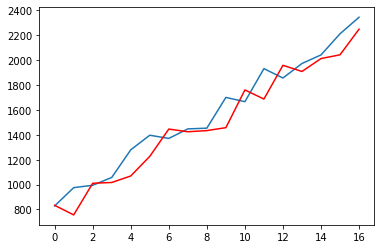

In [39]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import numpy
from statsmodels.tsa.ar_model import ARResults
def parser(x):
	return (x)
series = read_csv('farm3ARIMA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
 
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = read_csv('farm3ARIMA.csv', header=0, index_col=0)
X = difference(series.values)
# fit model
model = AR(X)
model_fit = model.fit(maxlag=6, disp=False)
# save model to file
model_fit.save('armodel.pkl')
# save the differenced dataset
numpy.save('ardata.npy', X)
# save the last ob
numpy.save('arobs.npy', [series.values[-1]])
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('armodel.pkl')
data = numpy.load('ardata.npy')
last_ob = numpy.load('arobs.npy')
# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 2458.906059


In [41]:
# update the data for the AR model with a new obs
import numpy
# get real observation
observation = 2465.5
# load the saved data
data = numpy.load('ardata.npy')
last_ob = numpy.load('arobs.npy')
# update and save differenced observation
diffed = observation - last_ob[0]
data = numpy.append(data, [diffed], axis=0)
numpy.save('ardata.npy', data)
# update and save real observation
last_ob[0] = observation
numpy.save('arobs.npy', last_ob)